<a href="https://colab.research.google.com/drive/1Fsi6iQgLdA-Issa2wBq7ksHmRfo8V5S0?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Link to the original dataset Colab: https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/master/projects/load_kay_images.ipynb#scrollTo=RTYcrxVJ7mqV

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from scipy import stats
import sklearn.linear_model as skl
from seaborn import heatmap
from sklearn.decomposition import PCA
import copy

In [ ]:
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

with np.load(fname) as dobj:
  dat = dict(**dobj)
labels = np.load('kay_labels.npy')

Resnet50

In [ ]:
fname = "resnet50_features.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ALYbVzD8Irznxx8BA65DnrcM09Tg5KgJ' -O resnet50_features.npy --quiet
fname = "resnet50_test_features.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1a1uwmP7oD7P_iHWmHRXKQq6o08b5DWpA' -O resnet50_test_features.npy --quiet

VGG16

In [ ]:
fname = "vgg16_features.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1epaylkWvcX0D-escbA9Yjj6WdJ3-SDcZ' -O vgg16_features.npy --quiet
fname = "vgg16_test_features.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WrY7hmGtVQRPcefUwCJUf1NyosG-EfMy' -O vgg16_test_features.npy --quiet

VGG16 Convolution Layer

In [ ]:
fname = "vgg16__train_convfeatures.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10r8jd5ql6e1HxuO-y_w7cbya7MJohtcF' -O vgg16_train_convfeatures.npy --quiet
fname = "vgg16_test_convfeatures.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_lbObrQt733e03yHAF3pADfsj6PuCLQ2' -O vgg16_test_convfeatures.npy --quiet

# VGG16 

In [ ]:
X_train = dat['responses']
X_test = dat['responses_test']
# feat_train = np.load('/content/drive/My Drive/Team KayGallant/Data/vgg16_train_convfeatures.npy', allow_pickle=True) 
# feat_test = np.load('/content/drive/My Drive/Team KayGallant/Data/vgg16_test_convfeatures.npy', allow_pickle=True)

# y_train = feat_train.item().get('layer{}'.format(1)).reshape(1740,-1)
# y_test = feat_test.item().get('layer{}'.format(1)).reshape(1740,-1)

y_train = np.load('/content/vgg16_features.npy') 
y_test = np.load('/content/vgg16_test_features.npy') 

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1750, 8428)
y_train.shape:  (1750, 4096)
X_test.shape:  (120, 8428)
y_test.shape:  (120, 4096)


In [ ]:
print('Test set statistics:')
print('\t Mean:\t', y_test.mean())
print('\t Std:\t', y_test.std(0).mean())
print('\t Range:\t', (np.max(y_test, axis=0)-np.min(y_test, axis=0)).mean())

Test set statistics:
	 Mean:	 0.18907653
	 Std:	 0.22372247
	 Range:	 1.1027477


## Try different regularization values for Ridge ($L_2$) regularization

In [ ]:
num = 10

alphas = np.logspace(6,7,num=num)

mse_train_vec = np.zeros_like(alphas)
mse_test_vec = np.zeros_like(alphas)

models_vec = []

progress = num

for a in alphas:
  print(progress, 'alphas remaining')

  model = skl.Ridge(alpha=a)

  model.fit(X_train, y_train)

  y_hat_Train = model.predict(X_train)
  mse_train = np.mean((y_train-y_hat_Train)**2)
  mse_train_vec[a == alphas] = mse_train

  y_hat_Test = model.predict(X_test)
  mse_test = np.mean((y_test-y_hat_Test)**2)
  mse_test_vec[a == alphas] = mse_test
  
  models_vec.append(model)

  progress -= 1

10 alphas remaining
9 alphas remaining
8 alphas remaining
7 alphas remaining
6 alphas remaining
5 alphas remaining
4 alphas remaining
3 alphas remaining
2 alphas remaining
1 alphas remaining


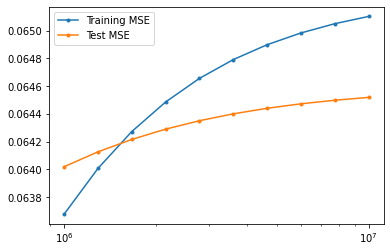

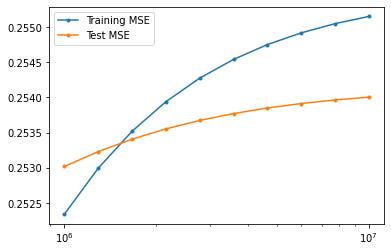

In [ ]:
plt.figure()
plt.plot(alphas, mse_train_vec, '.-', label='Training MSE')
plt.plot(alphas, mse_test_vec, '.-', label='Test MSE')
plt.xscale('log')
plt.legend()
# plt.yscale('log')

plt.figure()
plt.plot(alphas, np.sqrt(mse_train_vec), '.-', label='Training MSE')
plt.plot(alphas, np.sqrt(mse_test_vec), '.-', label='Test MSE')
plt.xscale('log')
plt.legend()
# plt.yscale('log')

## Try different regularization values for Lasso ($L_1$) regularization

10 alphas remaining


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


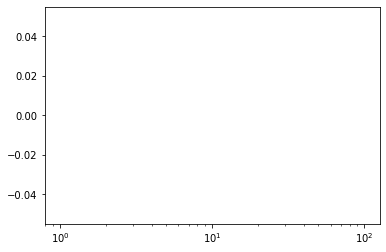

In [ ]:
num = 10

alphas = np.logspace(-10,-5,num=num)
# alphas = np.array([10**(1)])

mse_vec = np.zeros_like(alphas)

models_vec = np.zeros_like(alphas)

progress = num

for a in alphas:

  print(progress, 'alphas remaining')

  model = skl.Lasso(alpha=a, max_iter=50000, fit_intercept=True)
  
  model.fit(X_train, y_train)

  y_hat_Test = model.predict(X_test)

  mse = np.mean((y_test-y_hat_Test)**2)

  mse_vec[a == alphas] = mse

  models_vec[a == alphas] = model

  progress -= 1

plt.plot(alphas, mse_vec)
plt.xscale('log')

## Try different regularization values for both Ridge ($L_2$) and Lasso ($L_1$) regularization

In [ ]:
num = 10

alphas = np.logspace(0,5,num=num)
ratios = np.append( np.array([0]), np.logspace(-15,-10,num=num))

mse_vec = np.zeros(shape=(num,num+1))

progress_a = num
progress_r = num + 1

for r in ratios:
  print(progress_r, 'ratios remaining')
  print('Mixing ratio:', r)
  for a in alphas:
    print('\t', progress_a, 'alphas remaining')
    print('\t Alpha:', a)

    model = skl.ElasticNet(alpha=a, l1_ratio=r)

    model.fit(X_train, y_train)

    y_hat_Test = model.predict(X_test)

    mse = np.mean((y_test-y_hat_Test)**2)

    mse_vec[a == alphas, r == ratios] = mse

    progress_a -= 1
  progress_r -= 1

heatmap(mse_vec)

In [ ]:
model = skl.MultiTaskElasticNetCV()

model.fit(X_train, y_train)

y_hat_Test = model.predict(X_test)

mse= np.mean((y_test-y_hat_Test)**2)

# Resnet50 features

In [ ]:
X_train = dat['responses']
X_test = dat['responses_test']
y_train = np.load('/content/resnet50_features.npy') 
y_test = np.load('/content/resnet50_test_features.npy') 

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1750, 8428)
y_train.shape:  (1750, 2048)
X_test.shape:  (120, 8428)
y_test.shape:  (120, 2048)


In [ ]:
print('Test set statistics:')
print('\t Mean:\t', y_test.mean())
print('\t Std:\t', y_test.std(0).mean())
print('\t Range:\t', np.max(y_test)-np.min(y_test))

Test set statistics:
	 Mean:	 0.3976737
	 Std:	 0.2904784
	 Range:	 7.8412585


## Try different regularization values for Ridge ($L_2$) regularization

In [ ]:
num = 10

alphas = np.logspace(5.5,6,num=num)

mse_train_vec = np.zeros_like(alphas)
mse_test_vec = np.zeros_like(alphas)

models_vec = []

progress = num

for a in alphas:
  print(progress, 'alphas remaining')

  model = skl.Ridge(alpha=a)

  model.fit(X_train, y_train)

  y_hat_Train = model.predict(X_train)
  mse_train = np.mean((y_train-y_hat_Train)**2)
  mse_train_vec[a == alphas] = mse_train

  y_hat_Test = model.predict(X_test)
  mse_test = np.mean((y_test-y_hat_Test)**2)
  mse_test_vec[a == alphas] = mse_test
  
  models_vec.append(model)

  progress -= 1

10 alphas remaining
9 alphas remaining
8 alphas remaining
7 alphas remaining
6 alphas remaining
5 alphas remaining
4 alphas remaining
3 alphas remaining
2 alphas remaining
1 alphas remaining


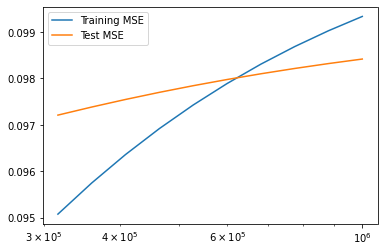

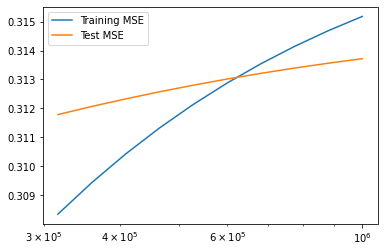

In [ ]:
plt.figure()
plt.plot(alphas, mse_train_vec, label='Training MSE')
plt.plot(alphas, mse_test_vec, label='Test MSE')
plt.xscale('log')
plt.legend()
# plt.yscale('log')

plt.figure()
plt.plot(alphas, np.sqrt(mse_train_vec), label='Training MSE')
plt.plot(alphas, np.sqrt(mse_test_vec), label='Test MSE')
plt.xscale('log')
plt.legend()
# plt.yscale('log')

## Try different regularization values for Lasso ($L_1$) regularization

10 alphas remaining


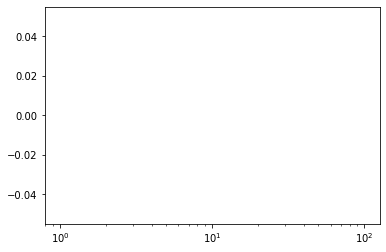

In [ ]:
num = 10

# alphas = np.logspace(-10,-5,num=num)
alphas = np.array([10**(1)])

mse_vec = np.zeros_like(alphas)

models_vec = np.zeros_like(alphas)

progress = num

for a in alphas:

  print(progress, 'alphas remaining')

  model = skl.Lasso(alpha=a, max_iter=5000, fit_intercept=True, tol=1e-2)
  
  model.fit(X_train, y_train)

  y_hat_Test = model.predict(X_test)

  mse = np.mean((y_test-y_hat_Test)**2)

  mse_vec[a == alphas] = mse

  models_vec[a == alphas] = model

  progress -= 1

plt.plot(alphas, mse_vec)
plt.xscale('log')

# Reduce Dimensions to prevent overfitting

In [ ]:
pca = PCA(.95)

y_tot = np.vstack((y_test, y_train))

y_new = pca.fit_transform(y_tot)

y_train = y_new[:1750,:]
y_test = y_new[1750:,:]

In [ ]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1750, 8428)
y_train.shape:  (1750, 448)
X_test.shape:  (120, 8428)
y_test.shape:  (120, 448)


In [ ]:
num = 10

alphas = np.logspace(-5,25,num=num)

mse_train_vec = np.zeros_like(alphas)
mse_test_vec = np.zeros_like(alphas)

models_vec = np.zeros_like(alphas)

progress = num

for a in alphas:
  print(progress, 'alphas remaining')

  model = skl.Lasso(alpha=a, max_iter=5000, tol=1e-2)

  model.fit(X_train, y_train)

  y_hat_Train = model.predict(X_train)
  mse_train = np.mean((y_train-y_hat_Train)**2)
  mse_train_vec[a == alphas] = mse_train

  y_hat_Test = model.predict(X_test)
  mse_test = np.mean((y_test-y_hat_Test)**2)
  mse_test_vec[a == alphas] = mse_test

  models_vec[a == alphas] = model

  progress -= 1

In [ ]:
plt.figure()
plt.plot(alphas, mse_train_vec, label='Training MSE')
plt.plot(alphas, mse_test_vec, label='Test MSE')
plt.xscale('log')
plt.legend()
# plt.yscale('log')

plt.figure()
plt.plot(alphas, np.sqrt(mse_train_vec), label='Training MSE')
plt.plot(alphas, np.sqrt(mse_test_vec), label='Test MSE')
plt.xscale('log')
plt.legend()
# plt.yscale('log')

# Running over different ROIs

In [ ]:
model = models_vec[np.argmin(np.abs(mse_test_vec - mse_train_vec))]

print('Model selected with alpha =', alphas[np.argmin(np.abs(mse_test_vec - mse_train_vec))])

runs = 20

progress = np.abs(runs)

mse_vec_tot = np.zeros(shape=(runs, len(dat['roi_names'])))

for k in range(runs):

  print('\t', progress, 'more runs...')

  mse_vec = []

  test_indices = np.random.choice(np.vstack((y_train, y_test)).shape[0], 120)

  X_test_loop = np.vstack((X_train, X_test))[test_indices,:]
  y_test_loop = np.vstack((y_train, y_test))[test_indices,:]

  for idx in range(len(dat['roi_names'])):
    X_test_cancelled = copy.deepcopy(X_test_loop)
    X_test_cancelled[:, dat['roi']==idx] = 0

    y_hat_Test_cancelled = model.predict(X_test_cancelled)

    mse = np.mean((y_test_loop-y_hat_Test_cancelled)**2)

    mse_vec.append(mse)
    # print('Test set MSE with ROI', idx, 'called', dat['roi_names'][idx], '(with', len(dat['roi'][dat['roi'] == idx]), 'voxels) cancelled out: \t', mse)
    mse_vec_tot[k, idx] = mse

  progress -= 1

Model selected with alpha = 1668100.537200059
	 20 more runs...
	 19 more runs...
	 18 more runs...
	 17 more runs...
	 16 more runs...
	 15 more runs...
	 14 more runs...
	 13 more runs...
	 12 more runs...
	 11 more runs...
	 10 more runs...
	 9 more runs...
	 8 more runs...
	 7 more runs...
	 6 more runs...
	 5 more runs...
	 4 more runs...
	 3 more runs...
	 2 more runs...
	 1 more runs...


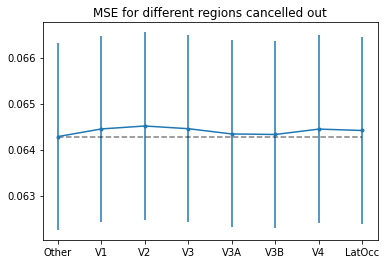

In [ ]:
plt.errorbar(range(8), mse_vec_tot.mean(0), yerr=mse_vec_tot.std(0), fmt='.-')
plt.hlines(mse_vec_tot.mean(0)[0], xmin=0, xmax=7, linestyles='dashed', alpha=0.5)
plt.xticks(ticks=range(8), labels=dat['roi_names'])
t = plt.title('MSE for different regions cancelled out')